This Notebook is a modified example from <https://github.com/adamdempsey90/NDTAMR>. It serves formulate a question regarding this package or adaptive mesh refinement in general. Instead of the original spiral we consider the characteristic function of a circle and wand to refine the mesh near its border.

## Introduction

This notebook will give a brief overview of some of the features available with the ndtamr module. 

In [1]:
import ndtamr.NDTree as nd
import ndtamr.AMR as amr
import ndtamr.Vis as vis
import ndtamr.Data as data

from matplotlib import pyplot as plt

### Setting up your data
We can define any type of data that we want to feed to the NDTAMR module. There are some example Data models in the ndtamr.Data module. For now we'll create a simple 2D model of a spiral. 

All data classes must inherit from the ndtamr.Data.GenericData class.

In [2]:
from ndtamr.Data import GenericData
import numpy as np
class Spiral2D(GenericData):
    """
    2D test class which consists of a one-armed spiral.
    """
    data_cols = ['value']
    def __init__(self,coords=(0,0),file=None,data=None):
        GenericData.__init__(self,coords=coords,file=file,data=data)

    def func(self):
        """Function which sets the data value"""
        
        xc, yc = self.coords
        
        res = xc**2 + yc**2 > 1
        return res
    def get_refinement_data(self):
        """Returns the data column which we want to refine on."""
        return self.value

### Initializing the Tree

Once we have our Data class defined, we can create an instance of the tree structure which holds our data. The ndtamr.NDTree module contains some useful functions which create trees to a certain depth. 

To start let's make a uniform grid of $2^4 \times 2^4$ points.

In [3]:
t = nd.make_uniform(depth=4,
                  dim=2,
                  data_class=Spiral2D,
                  xmin=(-2,-2),xmax=(2,2),
                  restrict_func=nd.restrict_datafunc,prolongate_func=nd.prolongate_datafunc)

When creating the tree, we specified the data class, the dimensions of the space, and how we want NDTAMR to handle moving data between different refinement levels. 


### Visualizing the Tree

The ndtamr.Vis module contains functions to visualize our data. For 2D domains, we can use the vis.plot function to make a simple visualization.

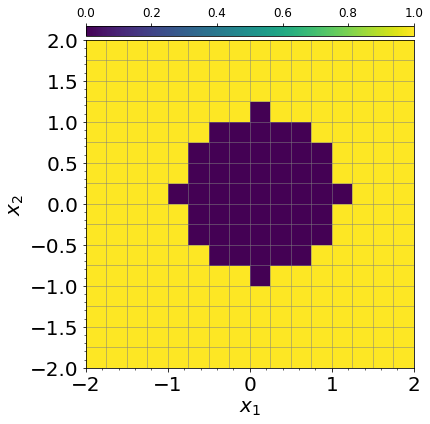

In [4]:
vis.plot(t,grid=True);

plt.savefig("circle1.png")

### Refining the Tree

If we want more detail in the above image, we can refine areas where the data is changing rapdily. The refinement producedures are handled in the ndtamr.AMR module. To move one level down in refinement we can call the refine function.

610 points out of 32^2 = 1024 for full grid
You have saved a factor of 1.68
With a compression factor of 40.43%


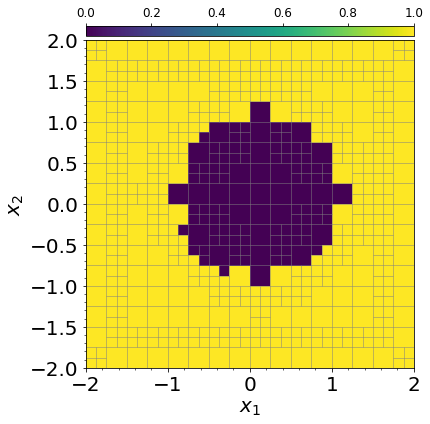

In [5]:
amr.refine(t,tol=.8,extent=2,min_value=1e-4)
amr.compression(t)
vis.plot(t,grid=True);

plt.savefig("circle2.png")

Note that we also printed out some information about the refinement with the amr.compression function. If we want more information we can set the show flag in amr.refine to True.